# MNIST - Beginner
This notebook is intended to demonstrate the implementation of a simple model in TensorFlow for recognising handwritten digits in images. This model was adapted from a [tutorial](https://www.tensorflow.org/get_started/mnist/beginners) on the TensorFlow website and was the starting point for the project. Before getting started, import any libraries that may be required.

In [1]:
# Import tensorflow and MNIST.
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library. pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

### Load the data
The next step is to load the data to train and test the model. For this we will use the MNIST data set. Luckily, because this is such a common data set, it is available in TensorFlow. This data set contains 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test) and 5,000 points of validation data (mnist.validation). The one-hot arguement means that the labels will be represented as one-hot arrays. For example, 4 would be represented as [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]. Each data point is a flattend 28px x 28px greyscale image, or in other words an array with 784 elements, each with a value between 0 and 255.

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Define the model
We'll use the softmax regression technique in our model. This is used to assign probabilities to an object being one of several different things. This techniques gives a list of values between 0 and 1 that add up to 1. Softmax involves adding up the evidence of an input being in a certain class and then converting that evidence into probabilities.

In [3]:
# Create a placeholder node for pixels of flattened image.
x = tf.placeholder(tf.float32, [None, 784])

# Create the weight and bias as variables so that their values can be adjusted by tensorflow.
# They are initialised as tensors full of zeros.
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Implement softmax.
y = tf.nn.softmax(tf.matmul(x, W) + b)

### Evaluate the model (Part 1)
We'll use the MNIST train data to evaluate the model at each training step. We input the test data into the model and compare the predictions to the actual values. From this we can then calculate the accuracy as a percentage. 

In [4]:
# Placeholder for the correct label.
y_ = tf.placeholder(tf.float32, [None, 10])

# Get index of highest entry on both the tensors representing the result and correct labels.
# - Result tensor (y) might be -        [0.1, 0.1, 0.05, 0.1, 0.1, 0.2, 0.1, 0.05, 0.1, 0.1] (Model classified digit as a 5 - total adds up to 1)
# - Correct label tensor (y) might be - [  0,   0,    0,   0,   0,   1,   0,    0,   0,   0] (one-hot vector representing the label 5)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

# Determine the fraction that are correct.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train the model
Before getting into training the model we'll define two variables. The first will determine the number of times the model should be trained. The second is the learning rate. By changing these two variables we can adjust the accuracy of the model.

In [5]:
training_epochs = 1000
learning_rate = 0.5

In order to train a model a cost function is required. This is used to quantify the accuracy of the model. The lower the cost the more accurate the model will be. The cross-entropy function is a common way to calculate the cost of a model in machine learning. Note that in this example we are using the gradient descent optimiser and pass in a learning rate. The optimiser will adjust the weights at each training step in proportion to the learning rate. There are other optimisers available. A full list can be found on the [training](https://www.tensorflow.org/api_guides/python/train) section of the TensorFlow website.

In [6]:
# Implement the cross-entropy function.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# Minimize cross_entropy using the gradient descent algorithm.
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

In order to actually train the model we must create a session in TensorFlow and initialise the vaiables. We train the model a number of times. Note that at each training step we will also record the accuracy and loss values to evaluate the model.

In [7]:
# Create a tensorflow session in which the model will run and initialize the variables.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

accuracy_history = np.empty(shape=[1], dtype=float)
loss_history = np.empty(shape=[1], dtype=float)

# Start by training the model 1000 times.
for _ in range(training_epochs):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    # Save accuracy value.
    accuracy_history = np.append(accuracy_history, sess.run(accuracy, feed_dict={x: batch_xs, y_: batch_ys}))
    
    # Save loss value.
    loss_history = np.append(loss_history, sess.run(cross_entropy, feed_dict={x: batch_xs, y_: batch_ys}))
    
    # Train the model.
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

### Evaluate the model (Part 2)
We've already evaluated the model during the training but we can now plot the accuracy and loss values to get a better sense of how the model is progressing at each training step. The goal is to maximise the accuracy while minimising the loss.

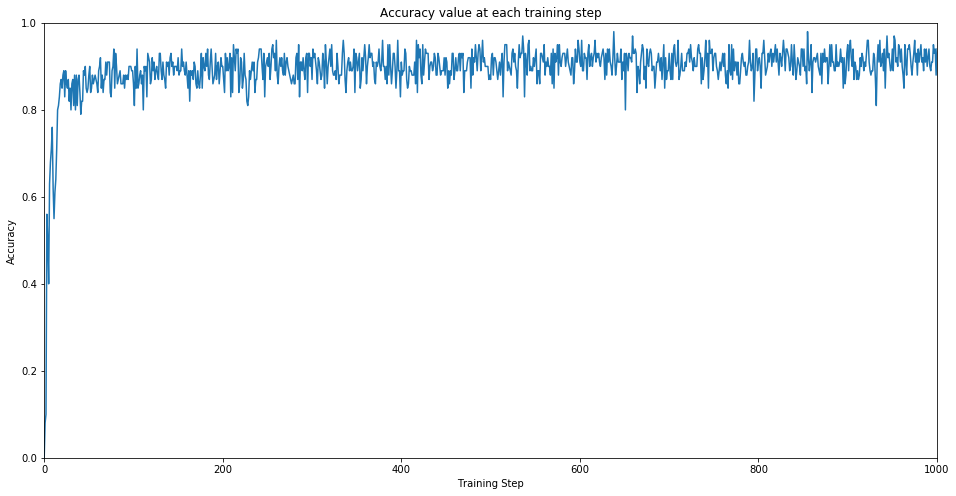

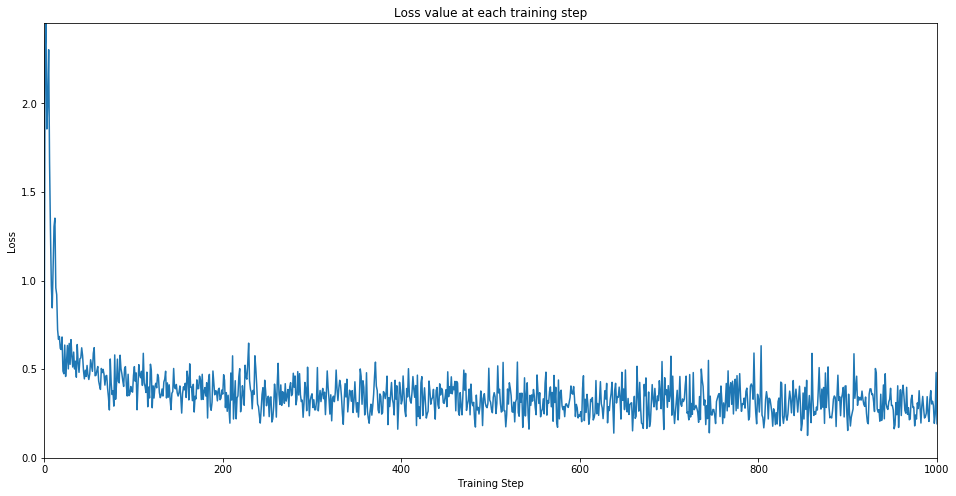

In [8]:
# This sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

# Adapted from https://aqibsaeed.github.io/2016-07-07-TensorflowLR/
# Plot accuracy values.
plt.plot(range(len(accuracy_history)), accuracy_history)
plt.axis([0, training_epochs, 0, 1])
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Accuracy value at each training step')
plt.show()

# Plot loss values.
plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, training_epochs, 0, np.max(loss_history)])
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Loss value at each training step')
plt.show()

We'll also evaluate the model using the MNIST test data set. You can expect an accuracy of approximately 92% from this model.

In [9]:
# Output the final accuracy for the test set.
print('Accuracy: %s' % (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

# Output the final loss for the test set.
print('Loss: %s' % (sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Accuracy: 0.9179
Loss: 0.287736


The advanced notebook will build on this model. By adding aditional layers we can increase the accuracy to approximately 99.2%.